In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tharunvirupakshi
Your Kaggle Key: ··········


100%|██████████| 211k/211k [00:00<00:00, 80.9MB/s]

In [116]:
import pandas as pd
import numpy as np

In [180]:
data_path = '/content/sms-spam-collection-dataset/spam.csv'

data = pd.read_csv(data_path, encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [181]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis='columns', inplace=True)

In [10]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [182]:
# Drop any null values
data.dropna(how="any", inplace=True, axis=1)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
# Rename columns
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [185]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Data visualization

In [186]:
data['message_len'] = data.message.apply(len)
data.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

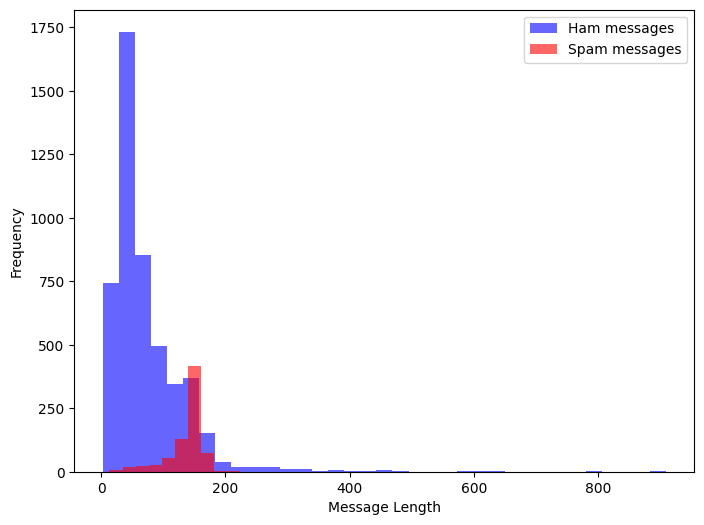

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

data[data.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
data[data.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

**Remarks:** Spam messages have more characters and longer messages.

In [20]:
data[data.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [21]:
from nltk.corpus import stopwords
from nltk import word_tokenize

import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
STOPWORDS = set(stopwords.words('english'))

In [24]:
def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [25]:
top_30_unigrams = get_top_n_bigram(data[data.label_num == 1].message, ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(data[data.label_num == 1].message, ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(data[data.label_num == 1].message, ngram=3, top=30)

In [26]:
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
fig = px.bar(df1, x='unigram', y='count', title='Top 30 Unigrams', color='unigram')
fig.update_layout(xaxis_title='Unigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

In [27]:
df1 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
fig = px.bar(df1, x='bigram', y='count', title='Top 30 Bigrams', color='bigram')
fig.update_layout(xaxis_title='Bigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

In [28]:
df1 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
fig = px.bar(df1, x='trigram', y='count', title='Top 30 Trigrams', color='trigram')
fig.update_layout(xaxis_title='Trigram', yaxis_title='Count')
fig.update_xaxes(tickangle=80)

fig.show()

### Data preprocessing

In [178]:
import string
from nltk.corpus import stopwords

def text_process(text):

    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # # Check characters to see if they are in punctuation
    # nopunc = [char for char in text if char not in string.punctuation]

    # # Join the characters again to form the string.
    # nopunc = ''.join(nopunc)

    # # Now just remove any stopwords
    # return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])


    words = word_tokenize(text)

    # Initialize stopwords and lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove numbers, lowercase words, remove stopwords, and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in STOPWORDS]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [187]:
data['clean_msg'] = data.message.apply(text_process)
data.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though


In [188]:
data

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


In [189]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 3), max_features=5000)

In [190]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data.clean_msg)

In [191]:
tfidf_vectorizer.get_feature_names_out()

array(['aah', 'aathi', 'abi', ..., 'ìï got', 'ìï still', 'ìï wan'],
      dtype=object)

In [192]:
train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [193]:
train_tfidf_df[:1]

,aah,aathi,abi,abiola,able,abt,ac,acc,accept,access,...,yup ok,yup thk,zed,zed profit,zed profit charity,åð,ìï,ìï got,ìï still,ìï wan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train test split

In [194]:
from sklearn.model_selection import train_test_split

X = train_tfidf_df
y = data.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [195]:
X_train.shape, X_test.shape

((3900, 5000), (1672, 5000))

### Model training

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [196]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=3)

array([0.92846154, 0.92923077, 0.93230769])

In [197]:
cross_val_score(MultinomialNB(), X_train, y_train, cv=3)

array([0.95846154, 0.95692308, 0.96307692])

In [198]:
cross_val_score(RandomForestClassifier(n_estimators=50), X_train, y_train, cv=3)

array([0.97307692, 0.96307692, 0.97461538])

In [107]:
cross_val_score(SVC(), X_train, y_train, cv=3)

array([0.96538462, 0.96153846, 0.97307692])

In [199]:
# Random Forest seems to be perfoming well

rf = RandomForestClassifier(n_estimators=100)

rf_model = rf.fit(X_train, y_train)


In [200]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')


    print(cf_report)
    print('Accuracy', accuracy)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [201]:
preds_rf = rf_model.predict(X_test)
evaluate(y_test, preds_rf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.86      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy 0.9778708133971292
Precision 0.9764621870429322
Recall 0.926844909234412
F1-Score 0.9497278932018401


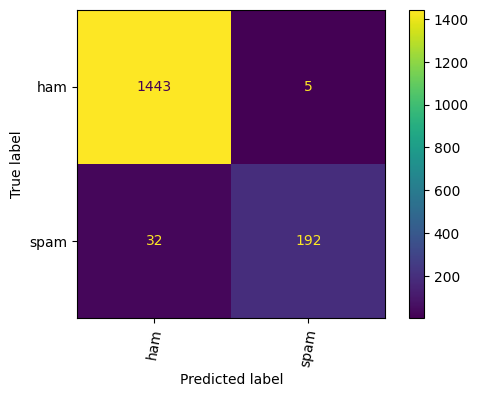

In [202]:
fig, ax = plt.subplots(figsize=(6, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_test, preds_rf)
cmp = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam'])
cmp.plot(ax=ax)
plt.xticks(rotation=80)

plt.show();

In [203]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (classifier) found by GridSearchCV
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
test_accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy with Best Estimator:", test_accuracy)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Test Accuracy with Best Estimator: 0.9766746411483254


### Test

In [204]:

def test_model(data, model):
  # Apply clean_text function to each text in the array using list comprehension
  cleaned_texts = [text_process(text) for text in data]
  tfidf_matrix = tfidf_vectorizer.transform(cleaned_texts)
  train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
  # lr_pred = model.predict(train_tfidf_df)
  predicted_probs = model.predict_proba(train_tfidf_df)
  labels = {0: 'not spam', 1: 'spam'}
  # Display predictions
  for index, (probs, highest_prob_index) in enumerate(zip(predicted_probs, np.argmax(predicted_probs, axis=1)), start=1):
    confidence = probs[highest_prob_index] * 100
    confidence = round(confidence, 2)
    label = labels[highest_prob_index]
    print(f"{index}: {confidence}% \t{label}")

In [206]:

sample_data = ['Hello, this is Sam',
        'URGENT: Your account requires immediate attention. Verify your details to avoid suspension.',
        "Cash prize alert! You've been selected as a winner. Reply now to claim your reward.",
        'Special deal for you! Buy one, get one free on selected items. Shop now!',
        "Limited time offer: Get 50% off on all purchases today! Don't miss out",
        "Important: Your package is waiting for delivery! Provide details for shipping confirmation.",
        "🌟 You've been SELECTED for a special MEMBERSHIP program! JOIN now for exciting BENEFITS!",
        ]

test_model(sample_data, rf_model)

1: 99.67% 	not spam
2: 64.8% 	not spam
3: 76.0% 	spam
4: 68.0% 	not spam
5: 89.0% 	not spam
6: 72.58% 	not spam
7: 83.27% 	not spam
8: 90.0% 	not spam
